In [50]:
# Import all the libraries necessary for our code
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Read in the CSV
csv = pd.read_csv(r'C:\Users\jtrie\OneDrive\WGU\D208\medical_clean.csv')

# Use .head() function to make sure dataframe has been created correctly
csv.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# Part III: Data Preparation

In [51]:
# Create a DF with only the columns needed to answer the research question
df = csv[['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Initial_days']].copy()

In [52]:
# Get a sense of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ReAdmis         10000 non-null  object 
 1   HighBlood       10000 non-null  object 
 2   Stroke          10000 non-null  object 
 3   Overweight      10000 non-null  object 
 4   Arthritis       10000 non-null  object 
 5   Diabetes        10000 non-null  object 
 6   Hyperlipidemia  10000 non-null  object 
 7   BackPain        10000 non-null  object 
 8   Anxiety         10000 non-null  object 
 9   Initial_days    10000 non-null  float64
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [53]:
# Check for missing values
df.isnull().sum()

ReAdmis           0
HighBlood         0
Stroke            0
Overweight        0
Arthritis         0
Diabetes          0
Hyperlipidemia    0
BackPain          0
Anxiety           0
Initial_days      0
dtype: int64

In [54]:
# Check for duplicated values within the dataset
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [55]:
# Creating dummy results for qualitative columns
coll_data = pd.DataFrame()
coll_data = df.iloc[:]
coll_data['ReAdmis'] = coll_data['ReAdmis'].map({'No':0, 'Yes':1}) 
coll_data['HighBlood'] = coll_data['HighBlood'].map({'No':0, 'Yes':1}) 
coll_data['Stroke'] = coll_data['Stroke'].map({'No':0, 'Yes':1}) 
coll_data['Overweight'] = coll_data['Overweight'].map({'No':0, 'Yes':1}) 
coll_data['Arthritis'] = coll_data['Arthritis'].map({'No':0, 'Yes':1}) 
coll_data['Diabetes'] = coll_data['Diabetes'].map({'No':0, 'Yes':1}) 
coll_data['Hyperlipidemia'] = coll_data['Hyperlipidemia'].map({'No':0, 'Yes':1}) 
coll_data['BackPain'] = coll_data['BackPain'].map({'No':0, 'Yes':1}) 
coll_data['Anxiety'] = coll_data['Anxiety'].map({'No':0, 'Yes':1}) 

In [56]:
# Check for collinearity (Detecting Multicollinearity with VIF - Python, 2020)

vif_data = pd.DataFrame()
vif_data["feature"] = coll_data.columns

vif_data["VIF"] = [variance_inflation_factor(coll_data.values, i)
                   for i in range(len(coll_data.columns))]

print(vif_data)

          feature       VIF
0         ReAdmis  5.441935
1       HighBlood  1.574853
2          Stroke  1.211935
3      Overweight  2.524319
4       Arthritis  1.471721
5        Diabetes  1.318604
6  Hyperlipidemia  1.414567
7        BackPain  1.579395
8         Anxiety  1.401671
9    Initial_days  8.146159


<Axes: ylabel='Initial_days'>

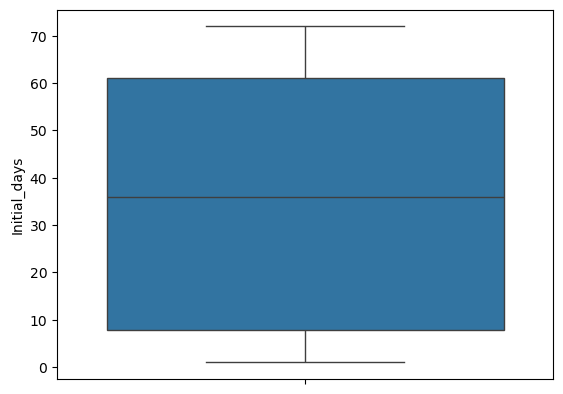

In [57]:
# Visually check for any outliers in our Initial_days variable
sns.boxplot(df['Initial_days'])

<Axes: xlabel='ReAdmis'>

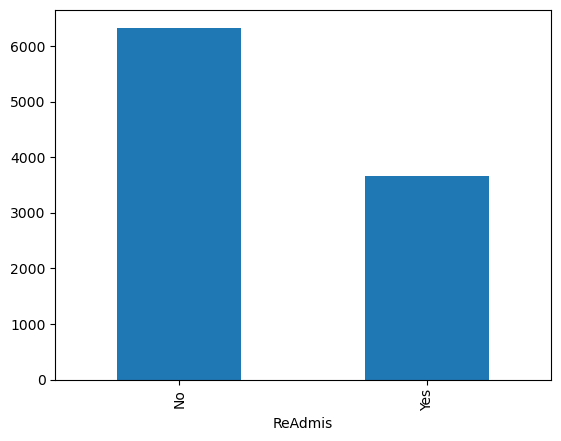

In [58]:
df['ReAdmis'].value_counts().plot(kind='bar')

<Axes: xlabel='HighBlood'>

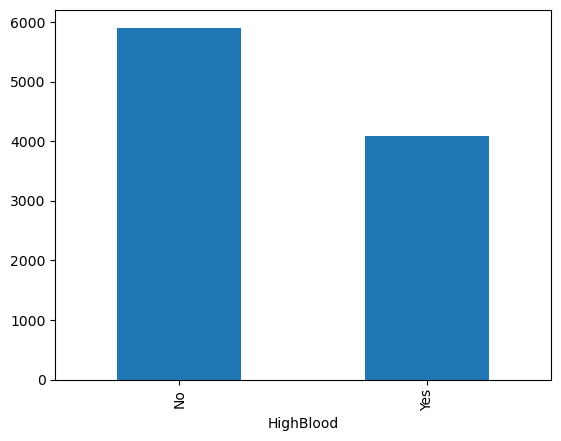

In [59]:
df['HighBlood'].value_counts().plot(kind='bar')

<Axes: xlabel='Stroke'>

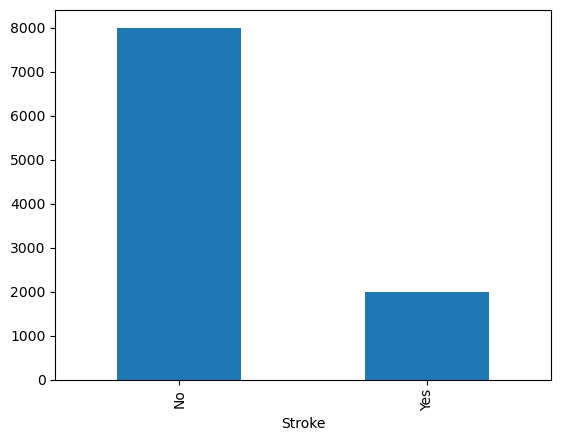

In [60]:
df['Stroke'].value_counts().plot(kind='bar')

<Axes: xlabel='Overweight'>

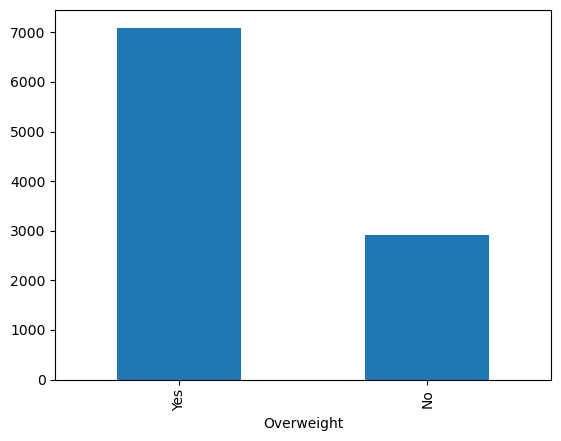

In [61]:
df['Overweight'].value_counts().plot(kind='bar')

<Axes: xlabel='Arthritis'>

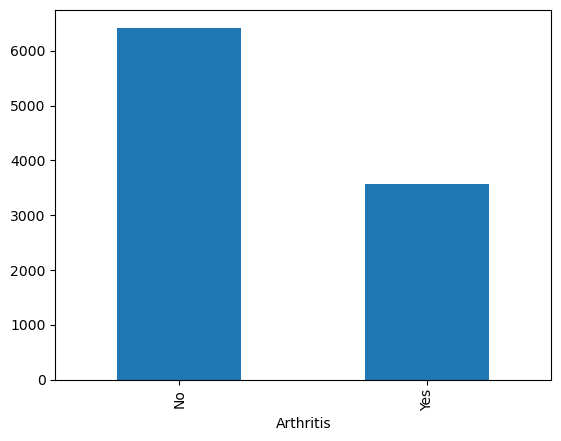

In [62]:
df['Arthritis'].value_counts().plot(kind='bar')

<Axes: xlabel='Diabetes'>

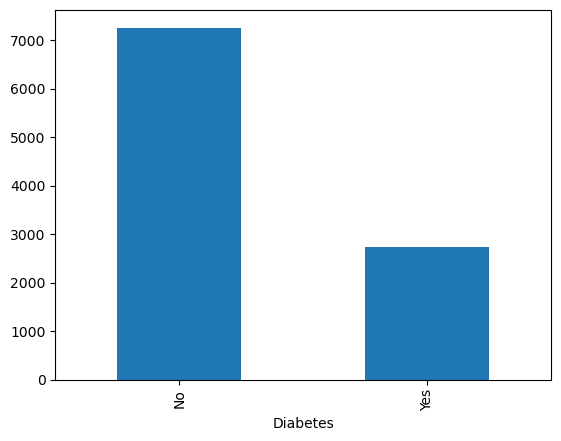

In [63]:
df['Diabetes'].value_counts().plot(kind='bar')

<Axes: xlabel='Hyperlipidemia'>

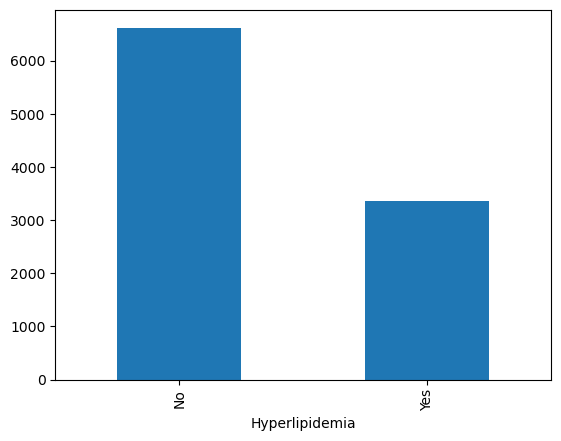

In [64]:
df['Hyperlipidemia'].value_counts().plot(kind='bar')

<Axes: xlabel='BackPain'>

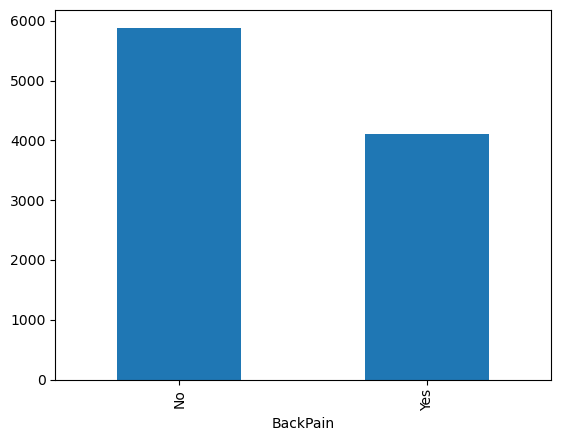

In [65]:
df['BackPain'].value_counts().plot(kind='bar')

<Axes: xlabel='Anxiety'>

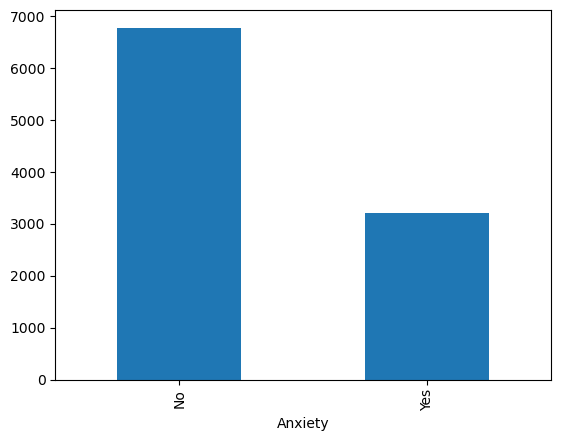

In [66]:
df['Anxiety'].value_counts().plot(kind='bar')

Text(0.5, 0, 'Initial_days')

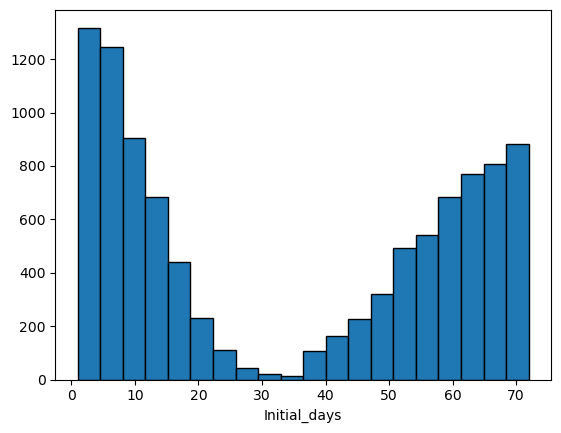

In [67]:
plt.hist(df['Initial_days'], bins=20, edgecolor='black')
plt.xlabel("Initial_days")

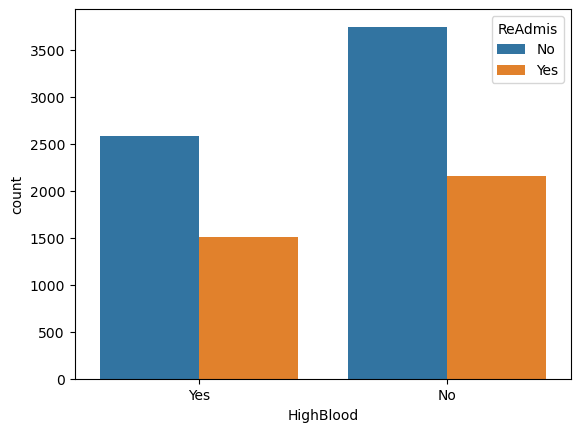

In [68]:
sns.countplot(data=df, x='HighBlood', hue='ReAdmis');

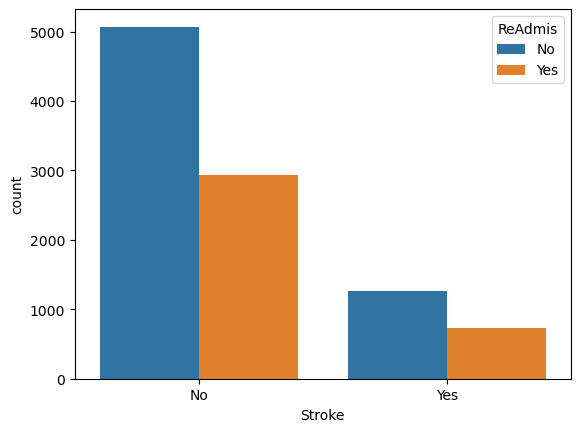

In [69]:
sns.countplot(data=df, x='Stroke', hue='ReAdmis');

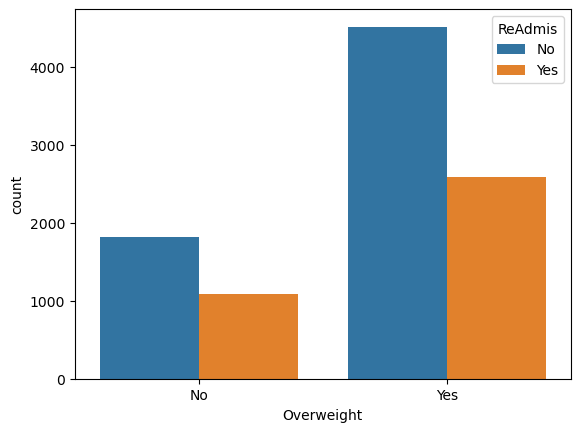

In [70]:
sns.countplot(data=df, x='Overweight', hue='ReAdmis');

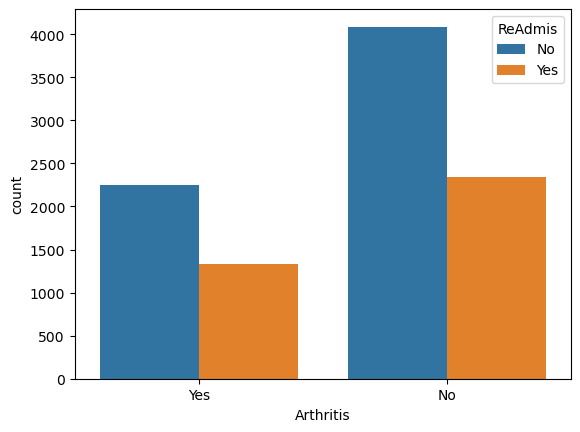

In [71]:
sns.countplot(data=df, x='Arthritis', hue='ReAdmis');

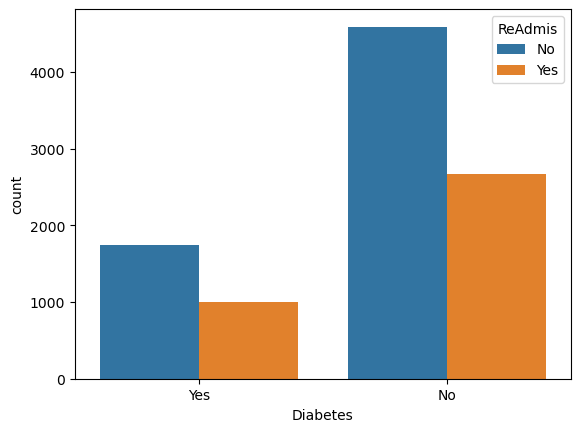

In [72]:
sns.countplot(data=df, x='Diabetes', hue='ReAdmis');

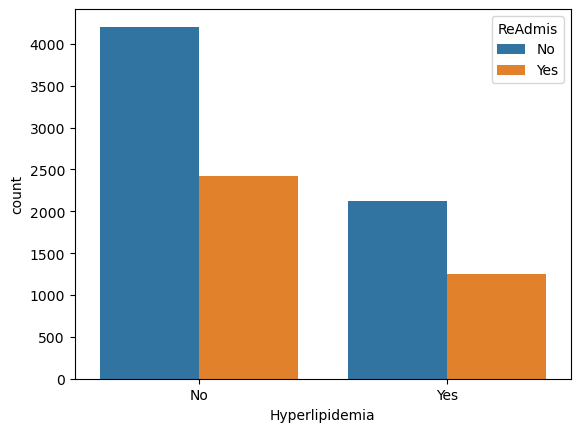

In [73]:
sns.countplot(data=df, x='Hyperlipidemia', hue='ReAdmis');

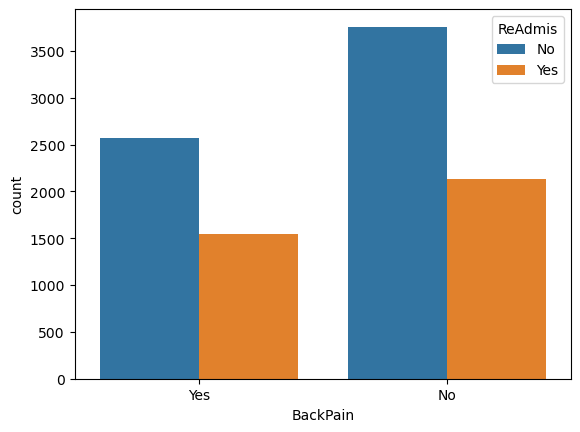

In [74]:
sns.countplot(data=df, x='BackPain', hue='ReAdmis');

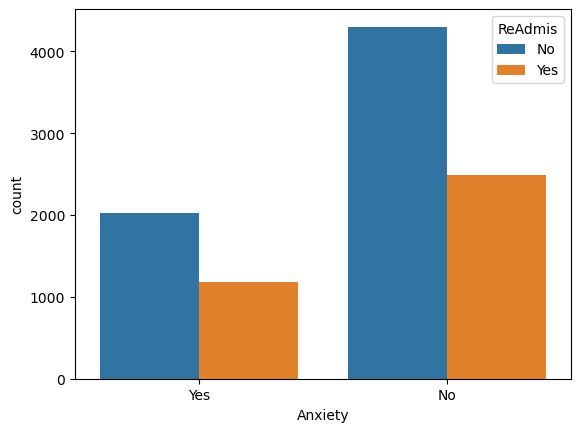

In [75]:
sns.countplot(data=df, x='Anxiety', hue='ReAdmis');

<Axes: xlabel='Initial_days', ylabel='ReAdmis'>

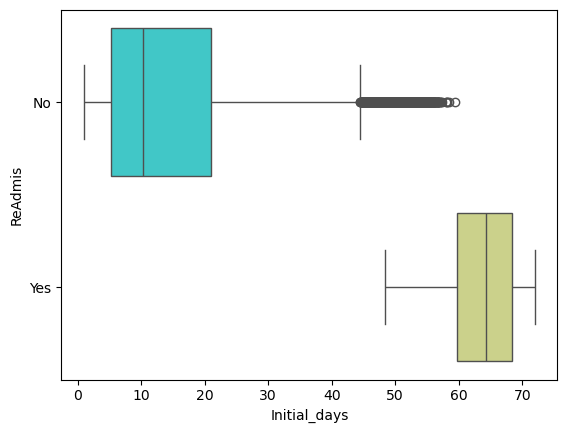

In [76]:
sns.boxplot(x='Initial_days', y='ReAdmis', data=df, palette='rainbow', legend=False, hue='ReAdmis')

In [77]:
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [78]:
df['ReAdmis'].value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [79]:
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [80]:
df['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [81]:
df['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [82]:
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [83]:
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [84]:
df['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [85]:
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [86]:
df['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [87]:
df['ReAdmis'] = df['ReAdmis'].map({'No':0, 'Yes':1}) 
df['HighBlood'] = df['HighBlood'].map({'No':0, 'Yes':1}) 
df['Stroke'] = df['Stroke'].map({'No':0, 'Yes':1}) 
df['Overweight'] = df['Overweight'].map({'No':0, 'Yes':1}) 
df['Arthritis'] = df['Arthritis'].map({'No':0, 'Yes':1}) 
df['Diabetes'] = df['Diabetes'].map({'No':0, 'Yes':1}) 
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'No':0, 'Yes':1}) 
df['BackPain'] = df['BackPain'].map({'No':0, 'Yes':1}) 
df['Anxiety'] = df['Anxiety'].map({'No':0, 'Yes':1}) 

In [88]:
df.to_csv(r"C:\Users\jtrie\OneDrive\WGU\D208\Prepared_Data_JTR_Task2.csv", index=False, header=True)

# Part IV: Model Comparison and Analysis

In [89]:
# Set our dependent variable, ReAdmis, as y (Bobbitt, 2022)
y = df['ReAdmis']

x = df.drop(columns='ReAdmis')

x = sm.add_constant(x)

model = sm.Logit(y, x).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.044178
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.9328
Time:                        20:36:20   Log-Likelihood:                -441.78
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -60.5132      2.929    -20.660      0.000     -66.254     -54.772
HighBlood       

In [90]:
X = df.drop(columns='ReAdmis')

lab = preprocessing.LabelEncoder() # (How to Fix: ValueError: Unknown Label Type: “Continuous,” 2022)
y_transformed = lab.fit_transform(y)

rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3, verbose=1) # (Automatic Recursive Feature Elimination | Python, 2023)
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.3, random_state = 0)

In [91]:
# Fits the eliminator to the data (Automatic Recursive Feature Elimination | Python, 2023)
rfe.fit(X_train, y_train)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3, verbose=1)

In [92]:
# Print the features and their ranking (high = dropped early on) (Automatic Recursive Feature Elimination | Python, 2023)
print(dict(zip(X.columns, rfe.ranking_)))

{'HighBlood': 4, 'Stroke': 5, 'Overweight': 7, 'Arthritis': 6, 'Diabetes': 1, 'Hyperlipidemia': 3, 'BackPain': 2, 'Anxiety': 1, 'Initial_days': 1}


In [93]:
# Print the features that are not eliminated (Automatic Recursive Feature Elimination | Python, 2023)
print(X.columns[rfe.support_])

Index(['Diabetes', 'Anxiety', 'Initial_days'], dtype='object')


In [94]:
y = df['ReAdmis']

x = df[['BackPain','Anxiety', 'Initial_days']]

x = sm.add_constant(x)

model = sm.Logit(y, x).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.048108
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.9268
Time:                        20:36:21   Log-Likelihood:                -481.08
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -54.8714      2.552    -21.500      0.000     -59.873     -49.869
BackPain         0.303

In [95]:
 # instantiate the model (using the default parameters) (Navlani, 2019)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1877,   34],
       [  29, 1060]], dtype=int64)

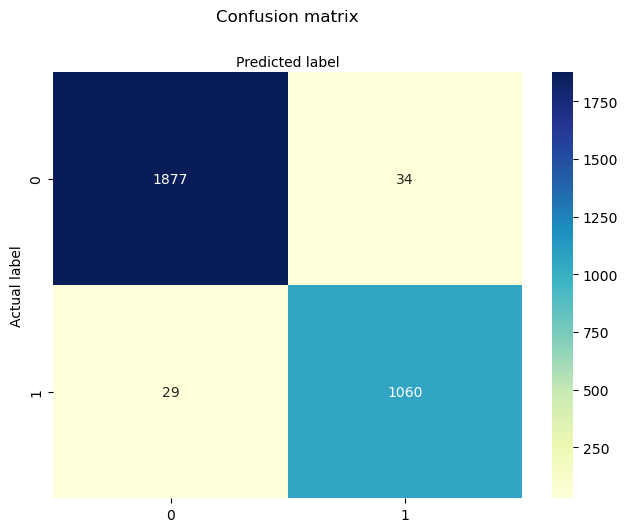

In [96]:
class_names=[0,1] # name  of classes (Navlani, 2019)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

(0.5,257.44,'Predicted label');

In [97]:
target_names = ['not readmitted', 'readmitted'] # (Navlani, 2019)
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

not readmitted       0.98      0.98      0.98      1911
    readmitted       0.97      0.97      0.97      1089

      accuracy                           0.98      3000
     macro avg       0.98      0.98      0.98      3000
  weighted avg       0.98      0.98      0.98      3000

